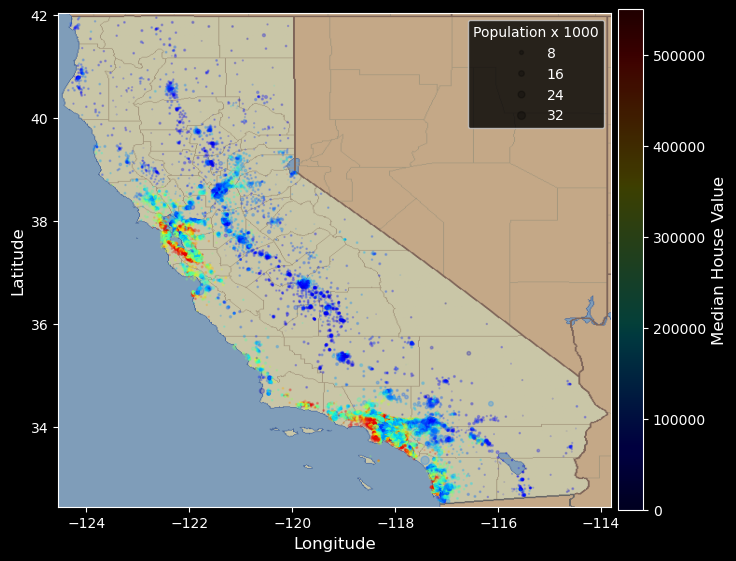

In [1]:
# --------------------------------------------------------------
# Contoh 5-1
# --------------------------------------------------------------
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import  pandas as pd


# Refer to https://developers.google.com/machine-learning/crash-course/california-housing-data-description
housing_df = pd.read_csv('housing.zip')

# Data preprocessing
# ... mengisi kolom total_bedrooms menggunakan rata-rata
# ... persentase bedroms terhadap total_rooms secara regional
pct_bedrooms = (housing_df.total_bedrooms / housing_df.total_rooms).agg('nanmean')
housing_df.total_bedrooms = housing_df.total_bedrooms.fillna(pct_bedrooms * housing_df.total_rooms)
# ... median income menunjukkan angka seharusnya. Angka yg tersimpan di CSV dalam satuan USD10,000
housing_df['median_income'] *= 10000
# ... pastikan beberapa kolom dalam satuan yang tepat sebelum ditampilkan dalam plot
housing_df = housing_df.astype({'housing_median_age':int, 'total_rooms':int,
                                'total_bedrooms':int, 'population':int,
                                'households':int })


# Tampilkan data yang sudah valid ke plot
img_california = mpimg.imread('california.png')

plt.figure(figsize=(8.5,6.5))
ax = plt.scatter(housing_df.longitude, housing_df.latitude,
            s=housing_df.population/1000,
            c=housing_df.median_house_value,
            cmap='jet',
            alpha=0.25 )
plt.legend( *ax.legend_elements("sizes",num=5),title='Population x 1000')
plt.colorbar(pad=0.01).set_label(label='Median House Value', size=12)
plt.clim(0, 550000)

plt.imshow(img_california, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.8)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

plt.show();